This is a report on the speed, memory, and solution quality of Forward Search Algorithms on the "Air Cargo Problem".

Here we see import the results of the tests into a Pandas DataFrame called algorithms, which shows the results in a table.

Each problem has a different number of possible actions (20, 72, 88, 194) and each algorithm "expands nodes" in order to find different combinations of possible solutions to the problem.  The algorithms that try many different combinations will have a high node counts.

But combinations is not the only important metric to judge an algorithm with.  For instance, an algorithm like UCS has huge node counts but since the time it takes to compute the next node is small, the time it takes is much less than one like A\* algorithms with very few nodes but potentially very high search times.

And probably most important: does the algorithm come up with a good solution to the problem in the first place? If the algorithm comes up with a plan with thousands of steps when the optimal plan has a dozen, we don't care how fast or few combinations it has to try to give us the terrible plan.

In [83]:
import numpy as np
import pandas as pd 

nodes = "nodes"
time = "search_time"
plan = "plan_length"
actions = "n_actions"
n = "name"

bfs = pd.DataFrame({
    n : "BFS",
    actions : [20, 72, 88, 104],
    nodes : [178, 30503, 129625, 944130],
    time : [0.00615, 1.8201565, 10.32857, 96.425857],
    plan : [6, 9, 12, 14]
}, index = [1, 2, 3, 4]) 


dfs = pd.DataFrame({
    n : "DFS",
    actions : [20, 72],
    nodes : [84, 5602],
    time : [0.0028914, 2.76338],
    plan : [20, 619]
}, index = [1, 2])

ucs = pd.DataFrame({
    n : "UCS",
    actions : [20, 72, 88, 104],
    nodes : [240, 46618, 161936, 1066413],
    time : [0.00615, 3.05, 12.62, 104.3778],
    plan : [6, 9, 12, 14]
}, index = [1, 2, 3, 4])

unmet_goals_gbfs = pd.DataFrame({
    n : "GBFS h(unmet)",
    actions : [20, 72, 88, 104],
    nodes : [29, 170, 230, 280],
    time : [0.001437, 0.017607, 0.03285, 0.05435],
    plan : [6, 9, 15, 18]
}, index = [1, 2, 3, 4])

level_sum_gbfs = pd.DataFrame({
    n : "GBFS h(sum)",
    actions : [20, 72, 88, 104],
    nodes : [28, 86, 126, 165],
    time : [0.34108, 7.5832, 16.5643, 29.785],
    plan : [6, 9, 14, 17]
}, index = [1, 2, 3, 4])

max_level_gbfs = pd.DataFrame({
    n : "GBFS h(max)",
    actions : [20, 72, 88, 104],
    nodes : [24, 249, 195, 580],
    time : [0.25273, 15.2748, 22.1564, 76.6789],
    plan : [6, 9, 13, 17]
}, index = [1, 2, 3, 4])


set_level_gbfs = pd.DataFrame({
    n : "GBFS h(set)",
    actions : [20, 72, 88, 104],
    nodes : [28, 84, 345, 1164],
    time : [1.123185, 24.7095, 131.2697, 576.01],
    plan : [6, 9, 17, 23]
}, index = [1, 2, 3, 4])

unmet_goals_astar = pd.DataFrame({
    n : "A* h(unmet)",
    actions : [20, 72, 88, 104],
    nodes : [206, 22522, 65711, 328509],
    time : [0.009477, 2.14246, 7.72678, 49.21],
    plan : [6, 9, 12, 14]
}, index = [1, 2, 3, 4])

level_sum_astar = pd.DataFrame({
    n : "A* h(sum)",
    actions : [20, 72, 88, 104],
    nodes : [122, 3426, 3403, 12210],
    time : [0.91664, 190.7919, 305.75765, 1794.2],
    plan : [6, 9, 12, 15]
}, index = [1, 2, 3, 4])

max_level_astar = pd.DataFrame({
    n : "A* h(max)",
    actions : [20, 72],
    nodes : [180, 26594],
    time : [0.9487677, 1114.313],
    plan : [6, 9]
}, index = [1, 2])

set_level_astar = pd.DataFrame({
    n : "A* h(set)",
    actions : [20, 72],
    nodes : [138, 9655],
    time : [2.943667, 1918.16058],
    plan : [6, 9]
}, index = [1, 2])

fs_algorithm_keys = np.array(['BFS', 'DFS', 'UCS', 'GBFS h(unmet)', 'GBFS h(sum)', 'GBFS h(max)', 'GBFS h(set)', \
                              'A* h(unmet)', 'A* h(sum)', 'A* h(max)', 'A* h(set)'])
algorithms = pd.concat([bfs, dfs, ucs, unmet_goals_gbfs, level_sum_gbfs, max_level_gbfs, set_level_gbfs, \
                        unmet_goals_astar, level_sum_astar, max_level_astar, set_level_astar])
algorithms = algorithms.rename_axis('problem')
print(algorithms)

         n_actions           name    nodes  plan_length  search_time
problem                                                             
1               20            BFS      178            6     0.006150
2               72            BFS    30503            9     1.820156
3               88            BFS   129625           12    10.328570
4              104            BFS   944130           14    96.425857
1               20            DFS       84           20     0.002891
2               72            DFS     5602          619     2.763380
1               20            UCS      240            6     0.006150
2               72            UCS    46618            9     3.050000
3               88            UCS   161936           12    12.620000
4              104            UCS  1066413           14   104.377800
1               20  GBFS h(unmet)       29            6     0.001437
2               72  GBFS h(unmet)      170            9     0.017607
3               88  GBFS h(unmet) 

Here we set up a couple functions called make_bar_graph and make_line_graph to help graph out the results without having a bunch of redundant lines of code.

Using MatPlotLib and the algorithms pd.DataFrame, we compare the number of actions to whatever variable we want to test: speed (search_time), plan quality (plan_length), and processing requirements (nodes).

In [107]:
import matplotlib.pyplot as plt
from matplotlib import style
# create plot
fig, ax = plt.subplots()
#style.use("ggplot")
line = ['-', '-', '-', ':', ':', ':', ":", '-.', '-.', '-.', '-.']
colors = ['b', 'c', 'r', 'g', 'm', 'y', 'grey', 'orange', 'k', 'pink', 'purple']

def plot_plt(x_label, y_label, title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

    plt.show()
    
def make_bar_graph(group, dependent_variable, independent_variable, 
                   x_label, 
                   y_label, 
                   title, 
                   bar_width=0.15, 
                   opacity = 0.8, 
                   action_classes=2):
    
    index = np.arange(action_classes) 
    bar_width = bar_width
    opacity = 0.8
    
    for a in range(len(group)):
        y = algorithms.loc[algorithms[n] == group[a], [dependent_variable, independent_variable]]
        plt.bar(index + (a+1)*bar_width, y[dependent_variable].values[:action_classes], bar_width, 
                alpha=opacity, color=colors[a], label=group[a])
    
    plt.xticks(index + (len(group)/2)*bar_width, y[independent_variable].values)
    plot_plt(x_label, y_label, title)

    
def make_line_graph(group, dependent_variable, independent_variable, 
                    x_label, 
                    y_label, 
                    title, 
                    bar_width=0.15, 
                    opacity = 0.8, 
                    action_classes=2):
    
    index = np.arange(action_classes) 
    bar_width = bar_width
    opacity = 0.8
    
    for a in range(len(group)):
        y = algorithms.loc[algorithms[n] == group[a], [independent_variable, dependent_variable]]
        plt.plot(y[independent_variable].values[:action_classes], y[dependent_variable][:action_classes], 
                 color=colors[a], linestyle=line[a], label=group[a])

    plot_plt(x_label, y_label, title)

Since the most important thing is getting a solution or a plan that actually works, we should test out plan length first.

Here is a bar graph of plan length between the first two problems with 20 and 72 actions respectively:

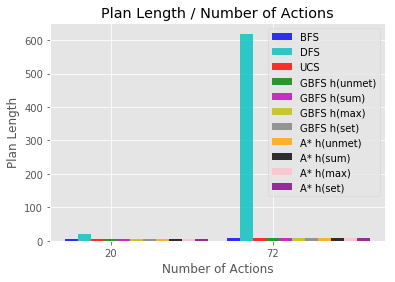

In [91]:
make_bar_graph(fs_algorithm_keys, plan, actions, 
              "Number of Actions",
              "Plan Length",
              "Plan Length / Number of Actions", 
              bar_width = 0.08)

Clearly we can rule out Depth First Search here. While all other algorithms are getting plan lengths of less than 10 steps, depth first search is already creating plans over 600 steps with 72 actions.


Next, time is certainly a consideration for this experiment. I don't have time to wait many years for the algorithm to find a solution, otherwise, this technology would be obscelete and this report wouldn't be necessary at all.  And quite frankly, 30 minutes or more isn't great in most cases either, especially during a 3 month program.


Here is a comparison of search times of the algorithms with an increasing number of actions.

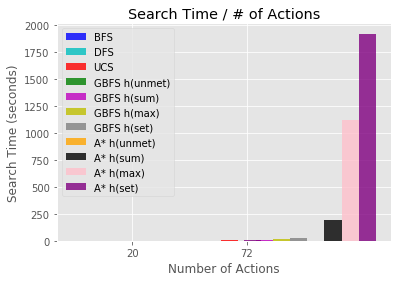

In [92]:
make_bar_graph(fs_algorithm_keys, time, actions, 
               "Number of Actions",
               "Search Time (seconds)", 
               "Search Time / # of Actions")

This is a compelling case for ruling out A\* with max level and set level heuristics. Already at 72 actions the search time for A\* with set level heuristic is over 30 minutes, and these two make the other algorithms nearly invisible on the graph at this scale.


Below we see a look at the rate of change of the node expansion of each algorithm between 20 and 72 actions.

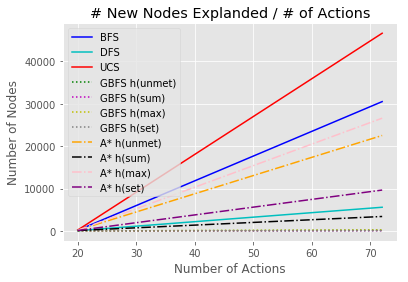

In [129]:
make_line_graph(fs_algorithm_keys, nodes, actions,
                "Number of Actions", 
                "Number of Nodes",
                "# New Nodes Explanded / # of Actions")

Again, although UCS expands to many nodes, the search time remains fast enough for more testing and watch out for increased search time as the rapidly increasing number of nodes.  Another observation here is the Greedy Best First Search algorithm finds solutions with very little node expansion which helps greatly with minimizing search time.


Since DFS, A\* max level, and set level heuristics are eliminated from our search for a forward search algorithm, the winners are shown below. 

In [93]:
winners = ['BFS', 'UCS', 'GBFS h(unmet)', 'GBFS h(sum)', 'GBFS h(max)', 'GBFS h(set)', 'A* h(unmet)', 'A* h(sum)']
frame = algorithms.loc[algorithms["name"].isin(winners), ['name', actions, nodes, time, plan]]
frame = frame.rename_axis('problem')
print(frame)

                  name  n_actions    nodes  search_time  plan_length
problem                                                             
1                  BFS         20      178     0.006150            6
2                  BFS         72    30503     1.820156            9
3                  BFS         88   129625    10.328570           12
4                  BFS        104   944130    96.425857           14
1                  UCS         20      240     0.006150            6
2                  UCS         72    46618     3.050000            9
3                  UCS         88   161936    12.620000           12
4                  UCS        104  1066413   104.377800           14
1        GBFS h(unmet)         20       29     0.001437            6
2        GBFS h(unmet)         72      170     0.017607            9
3        GBFS h(unmet)         88      230     0.032850           15
4        GBFS h(unmet)        104      280     0.054350           18
1          GBFS h(sum)         20 

Again, making a good plan is important, so first we make sure to the  plan length doesn't rise to ridiculous levels.  Here is a look at the plan lengths of the winner algorithms that made the cut to be tested for 88 and 104 actions in problems 3 and 4.

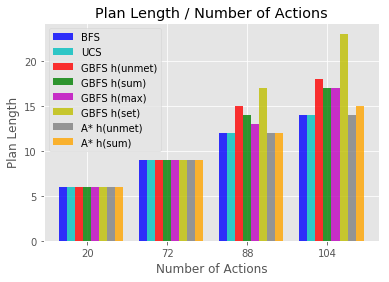

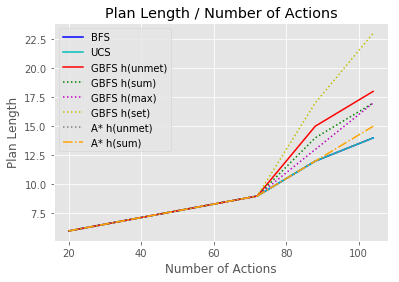

In [128]:
make_bar_graph(winners, plan, actions, 
              "Number of Actions",
              "Plan Length",
              "Plan Length / Number of Actions",
              action_classes = 4,
              bar_width = 0.1)

make_line_graph(winners, plan, actions,
              "Number of Actions",
              "Plan Length",
              "Plan Length / Number of Actions",
              action_classes = 4)

The uninformed search and A\* algorithms perfomed better in terms of minimizing the steps of the plan compared to GBFS. However, the plans the Greedy Best First Algorithms produce seem to be fine, just not optimal. And it's also worth noting that the A\* algorithm with level sum heuristic did not find the optimal path either with 104 actions.

Another observation to consider is the GBFS algorithm with set level heuristic seems to be increasing disproportionately in plan length than the rest of the heuristics tested. This may begin to develop problems with more complex problems.


Next is differences in search times within the algorithms:

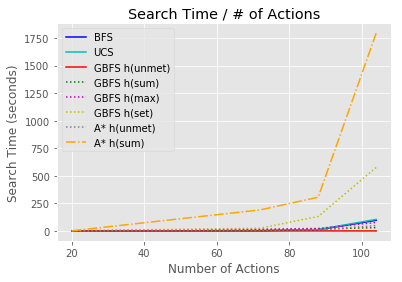

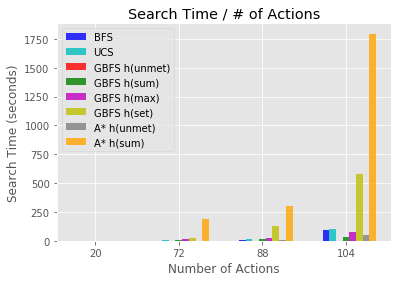

In [127]:
make_line_graph(winners, time, actions, 
                "Number of Actions", 
                "Search Time (seconds)", 
                'Search Time / # of Actions', 
                action_classes=4)

make_bar_graph(winners, time, actions, 
               "Number of Actions", 
               "Search Time (seconds)", 
               "Search Time / # of Actions", 
               bar_width = 0.08,
               action_classes=4)

We see A\* level sum heuristic and to a lesser degree GBFS set level heuristic search algorithm's search time drastically increasing as more actions are added.  This evidence shows as complexity of the problem grows, simpler heuristics prevail in the Air Cargo Problem.

To get a better look at the differences between the other algorithms, we check out the two graphs below.  The first graph is with the A\* algorithm with level sum heuristic removed.  Since the scale is still not great for understanding the differences between the remaining algorithms with nearl 600 seconds , it was removed for the second graph. Finally the last graph shows the rates of change in search time between problems.

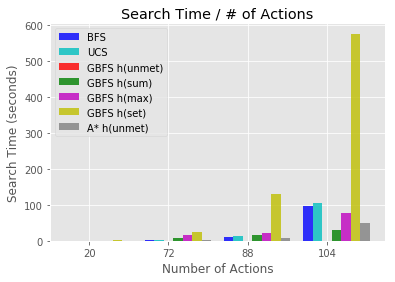

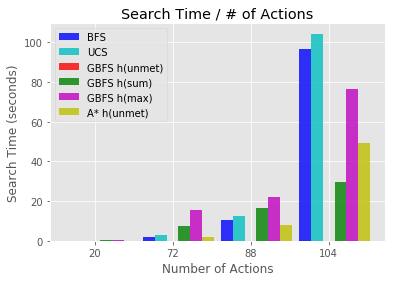

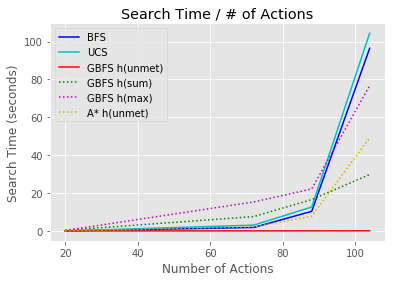

In [125]:
new_group = winners[:7]
make_bar_graph(new_group, time, actions, 
               "Number of Actions", 
               "Search Time (seconds)", 
               "Search Time / # of Actions", 
                action_classes=4,
                bar_width = 0.12)

new_group.remove('GBFS h(set)')
make_bar_graph(new_group, time, actions, 
               "Number of Actions", 
               "Search Time (seconds)", 
               "Search Time / # of Actions", 
               action_classes=4)

make_line_graph(new_group, time, actions, 
               "Number of Actions", 
               "Search Time (seconds)", 
               "Search Time / # of Actions", 
               action_classes=4)

Uninformed search is beginning to show their node expansion issues in search time. BFS and UCS would be the next algorithms to be eliminated if the complexity kept growing and eliminations kept happening.

Clearly, Greed Best First Search with the unmet goals heuristic is dominating time and accuracy. Not only is the search time for over 100 actions much less than 1/10th of a second, but continues to give the optimal plan length.


Expanding a bit on the nodes expanded bit, the graph below shows the explosion of nodes in the uninformed search algorithms' search process. 

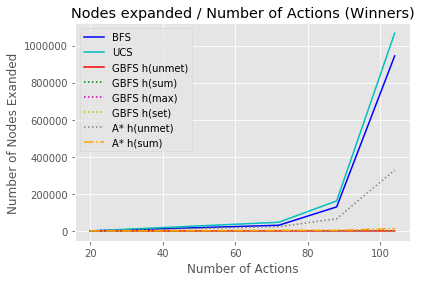

In [106]:
make_line_graph(winners, actions, nodes, 
               "Number of Actions", 
               "Number of Nodes Exanded",
               "Nodes expanded / Number of Actions (Winners)",
               action_classes = 4)

The number of nodes exanded in the uninformed search methods grows the fastest of the three families of algorithms.  UCS clearly exands the most nodes but as we will see later, does not effect the speed Greedy Best First Search expands by far the least amount of nodes, only exanding to about 300 nodes even when the actions numbers over 100.  

The first graph below highlights the difference in node expansion between the GBFS and A\* algorithms. Clearly the A\* algorithms expand many times more nodes than the GBFS's.

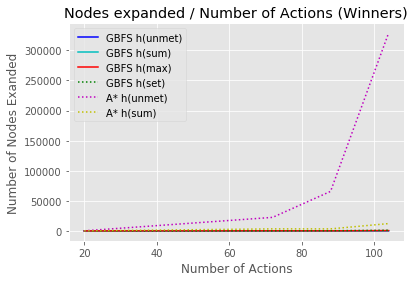

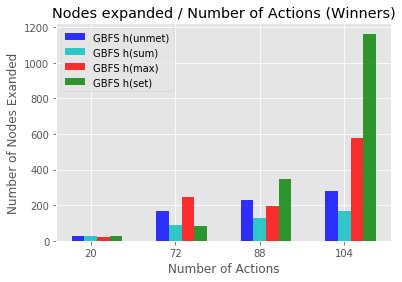

In [124]:
informed_winners = winners[2:]
make_line_graph(informed_winners, nodes, actions, 
               "Number of Actions", 
               "Number of Nodes Exanded",
               "Nodes expanded / Number of Actions (Winners)",
               action_classes = 4)


make_bar_graph(informed_winners[:4], nodes, actions, 
               "Number of Actions", 
               "Number of Nodes Exanded",
               "Nodes expanded / Number of Actions (Winners)",
               action_classes = 4)

The second graph shows the differences between the heuristic performance within the GBFS algorithm on the Air Cargo Problem.  The Set Level Heuristic is certainly expanding nodes at an alarming rate compared to the other heuristics, which will cause performance issues as number of actions increases. 

Questions:

Which algorithms would be most approprate for planning in:

1. a very restricted domain (with few actions) and needs to run in real time?

The algorithms that would be most appropriate for planning with few actions and real runtime would be UCS and Greedy Best First Search with simple heuristics.  Even when the number of actions reached over 100, GBFS with unmet goals heuristic found a path in less than 1/10th of a second whereas the next best algorithm outside the GBFS family took nearly 50 seconds (astar with unmet goals heuristic).

2. in large domains like delivery routes?

The algorithms that would work well in large domains are Greedy Best First Search.  GBFS algorithms have very fast runtime and very little node exansion whereas astar algorithms and uninformed search methods exponentially increase in search time and memory usage as domains get larger.  Although the plan with the least amount of actions is less likely to be selected as the domain increases, this could be negligible.  If the actions like flying have a wide range of times like Fly(SFO,JFK) would take about 6 hours and Fly(JFK,ATL) will take about half that, the number of steps may not be the metric of choice for efficiency and optimality.

3. in problems where he optimum plan is the only important plan to find?

The algorithms that should be used in problems where the optimal plan is the only important one to find is the Astar algorithms and UCS.  Depending on the heuristic function used, the astar algorithm should converge on the shortest path and UCS converged in all 4 problems with good performance. Greedy Best First Searches, although very fast, did not find the optimal plans as the domain size increased. 